### 18762 - Circuit Simulation <br/> Project 1 <br/> Lucas Godshalk

The simulator's primary logic is divided between two locations, `/classes` and `/lib`. The classes folder contains the implementations for all of the individual circuit elements, while the lib folder contains the main circuit simulation logic. The code doesn't deviate much from the original structure, although one notable addition is the `matrixprovider` class, which handles all matrix operations and swaps between sparse and non-sparse options.

The primary required python packages are `numpy` and `scipy`. You can regenerate this report using the `./build-report.sh` if you are on linux/WSL.

In [1]:
from classes.Settings import Settings
from lib.solve import solve
from matplotlib import pyplot as plt 
from lib.parse_json import parse_json

# Part 1: RL Circuit

In [2]:
rl_devices = parse_json('testcases/RL_circuit.json')
rl_results = solve(rl_devices, Settings())

Running solver (sparse mode: False)...
Circuit has 13 nodes
Total Y matrix size for circuit will be 28
Solver execution complete. Ran for 0.594294834 seconds.


#### RL Output Voltage

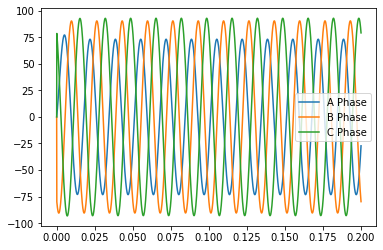

In [3]:
x = rl_results.get_timesteps()
waveforms = [
    (rl_results.get_node_voltage("n3_a"), "A Phase"),
    (rl_results.get_node_voltage("n3_b"), "B Phase"),
    (rl_results.get_node_voltage("n3_c"), "C Phase")
]
for (waveform, label) in waveforms:
    plt.plot(x, waveform, label=label)
plt.legend()
plt.show()

#### RL Output Current

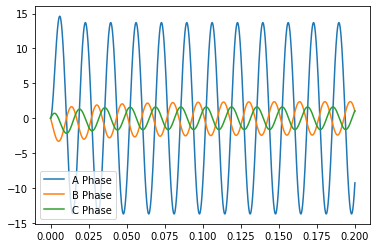

In [4]:
plt.clf()
waveforms = [
    (rl_results.get_current_flow("n4_a", "gnd"), "A Phase"),
    (rl_results.get_current_flow("n4_b", "gnd"), "B Phase"),
    (rl_results.get_current_flow("n4_c", "gnd"), "C Phase")
]
x = rl_results.get_timesteps()
for (waveform, label) in waveforms:
    plt.plot(x, waveform, label=label)
plt.legend()
plt.show()

#### RL Sparse Efficiency

In [5]:
rl_results = solve(rl_devices, Settings(useSparseMatrix=False))
rl_results = solve(rl_devices, Settings(useSparseMatrix=True))

Running solver (sparse mode: False)...
Circuit has 13 nodes
Total Y matrix size for circuit will be 28
Solver execution complete. Ran for 0.307463631 seconds.
Running solver (sparse mode: True)...
Circuit has 13 nodes
Total Y matrix size for circuit will be 28
Solver execution complete. Ran for 0.866490181 seconds.


# Part 2: IM Circuit

In [6]:
im_devices = parse_json('testcases/IM_circuit.json')
im_results = solve(im_devices, Settings())

Running solver (sparse mode: False)...
Circuit has 10 nodes
Total Y matrix size for circuit will be 26
Solver execution complete. Ran for 1.176363178 seconds.


#### IM Output Rotor Speed

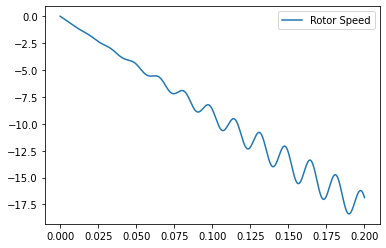

In [7]:
plt.clf()
x = im_results.get_timesteps()
im_waveforms = im_results.get_IM_waveforms("im1")
plt.plot(x, im_waveforms["wr"], label="Rotor Speed")
plt.legend()
plt.show()

#### IM Output Rotor and Stator Currents

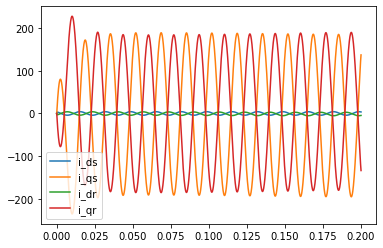

In [8]:
plt.clf()
plt.plot(x, im_waveforms["ids"], label="i_ds")
plt.plot(x, im_waveforms["iqs"], label="i_qs")
plt.plot(x, im_waveforms["idr"], label="i_dr")
plt.plot(x, im_waveforms["iqr"], label="i_qr")
plt.legend()
plt.show()

#### IM Output Electrical Torque

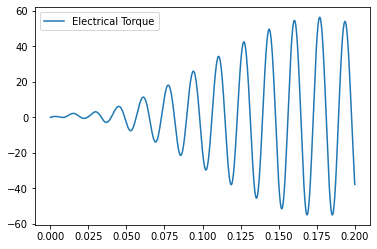

In [9]:
plt.clf()
plt.plot(x, im_waveforms["Te"], label="Electrical Torque")
plt.legend()
plt.show()

#### IM Sparse Efficiency

In [10]:
im_results = solve(im_devices, Settings(useSparseMatrix=False))
im_results = solve(im_devices, Settings(useSparseMatrix=True))

Running solver (sparse mode: False)...
Circuit has 10 nodes
Total Y matrix size for circuit will be 26
Solver execution complete. Ran for 1.28553277 seconds.
Running solver (sparse mode: True)...
Circuit has 10 nodes
Total Y matrix size for circuit will be 26
Solver execution complete. Ran for 2.481969672 seconds.
